In [40]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import numpy as np
import time as t
from PIL import Image
import cv2
import os


### Load Data 

In [ ]:
IMG_DIR = './OUTLIERS'
model = keras.models.load_model('./Models/Baseline.h5')
print(model.summary())

### Evaluate Model Performance on few instances of the Test Data
#### We take 10 samples of each class in test data and check the model's prediction

(10, 10, 28, 28, 1)
Model's prediction on test images of class 0
Output  1   Class:  [0]


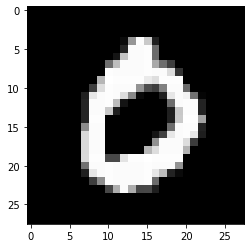

Output  2   Class:  [0]


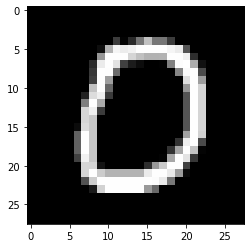

Output  3   Class:  [0]


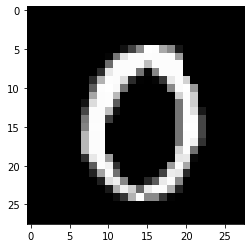

Output  4   Class:  [0]


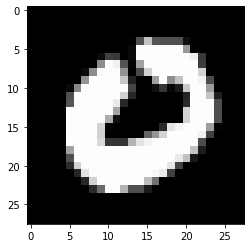

Output  5   Class:  [0]


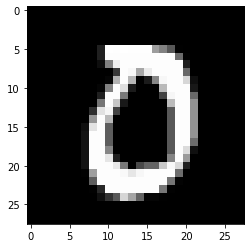

Output  6   Class:  [0]


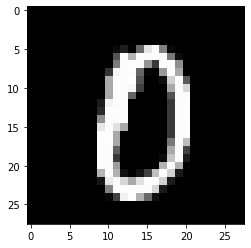

Output  7   Class:  [0]


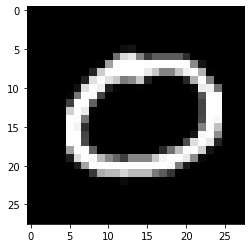

Output  8   Class:  [0]


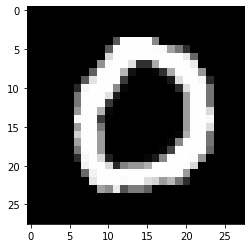

Output  9   Class:  [0]


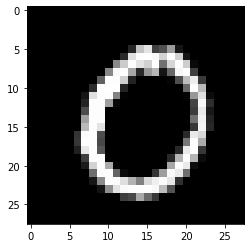

Output  10   Class:  [0]


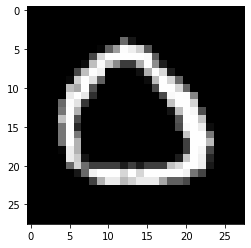

Model's prediction on test images of class 1
Output  1   Class:  [1]


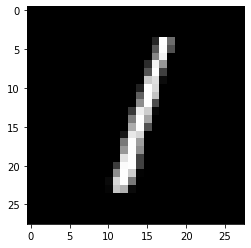

Output  2   Class:  [1]


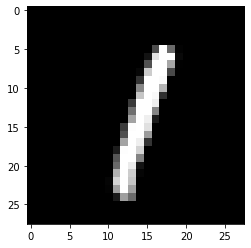

Output  3   Class:  [1]


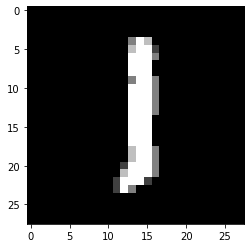

Output  4   Class:  [1]


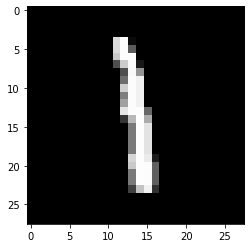

Output  5   Class:  [1]


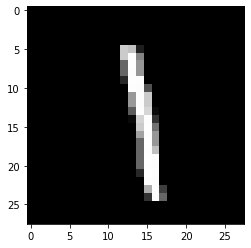

Output  6   Class:  [1]


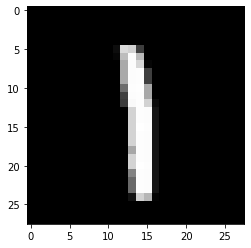

Output  7   Class:  [1]


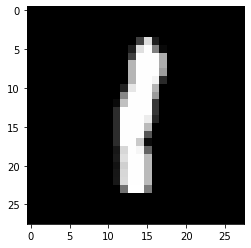

Output  8   Class:  [1]


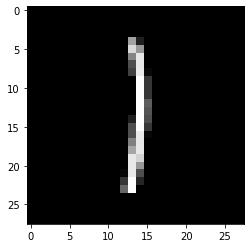

Output  9   Class:  [1]


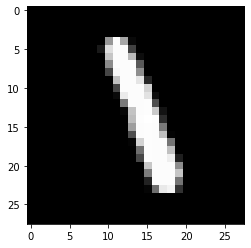

Output  10   Class:  [1]


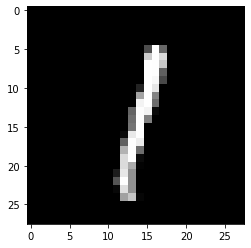

Model's prediction on test images of class 2
Output  1   Class:  [2]


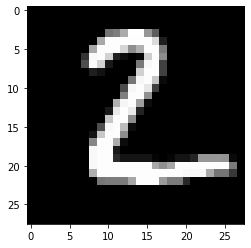

Output  2   Class:  [2]


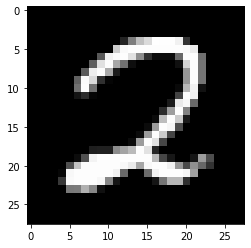

Output  3   Class:  [2]


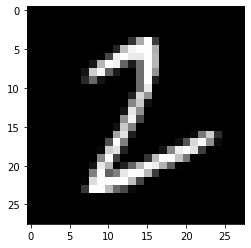

Output  4   Class:  [2]


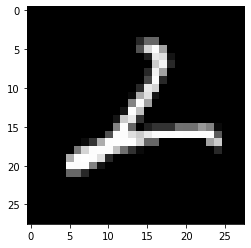

Output  5   Class:  [2]


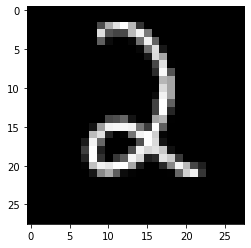

Output  6   Class:  [2]


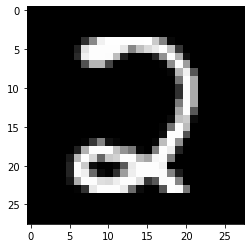

Output  7   Class:  [2]


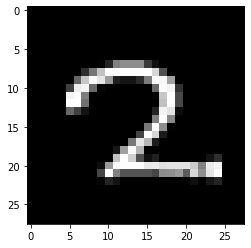

Output  8   Class:  [2]


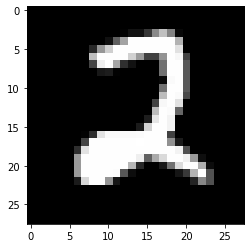

Output  9   Class:  [2]


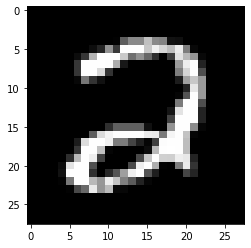

Output  10   Class:  [2]


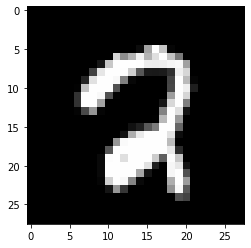

Model's prediction on test images of class 3
Output  1   Class:  [3]


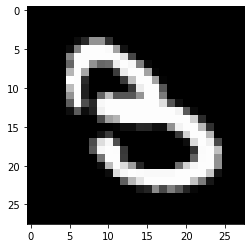

Output  2   Class:  [3]


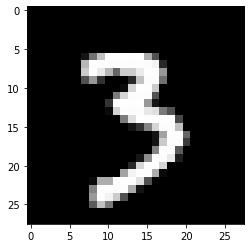

Output  3   Class:  [3]


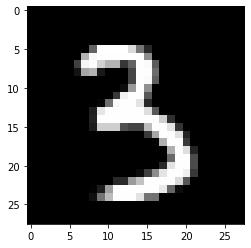

Output  4   Class:  [3]


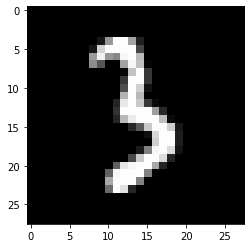

Output  5   Class:  [3]


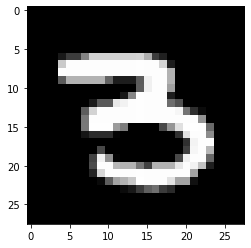

Output  6   Class:  [3]


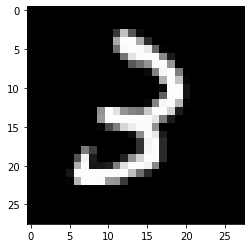

Output  7   Class:  [3]


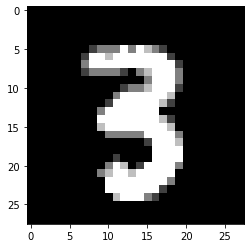

Output  8   Class:  [3]


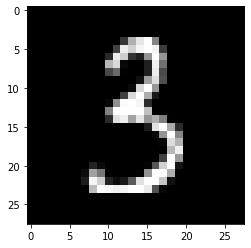

Output  9   Class:  [3]


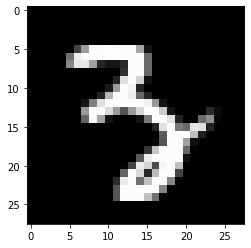

Output  10   Class:  [3]


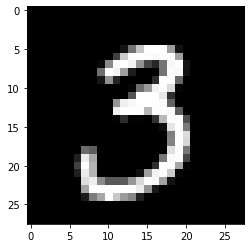

Model's prediction on test images of class 4
Output  1   Class:  [4]


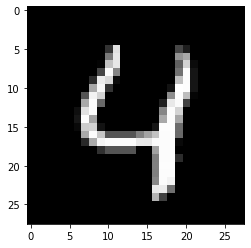

Output  2   Class:  [4]


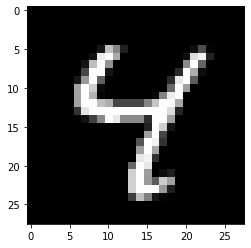

Output  3   Class:  [4]


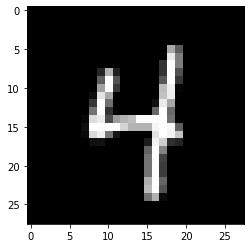

Output  4   Class:  [4]


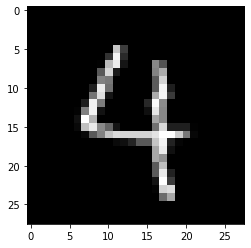

Output  5   Class:  [4]


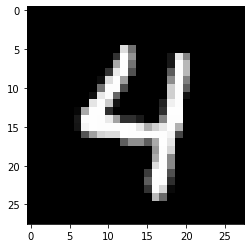

Output  6   Class:  [4]


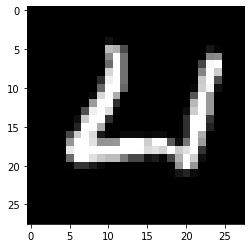

Output  7   Class:  [4]


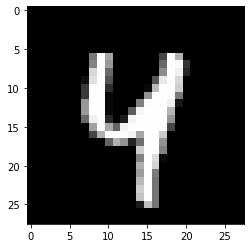

Output  8   Class:  [4]


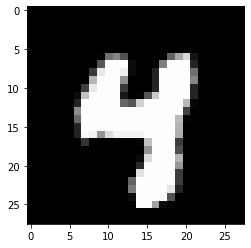

Output  9   Class:  [4]


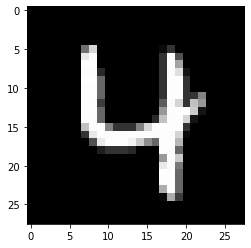

Output  10   Class:  [4]


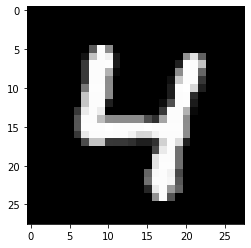

Model's prediction on test images of class 5
Output  1   Class:  [5]


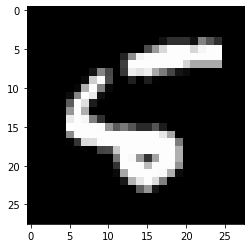

Output  2   Class:  [5]


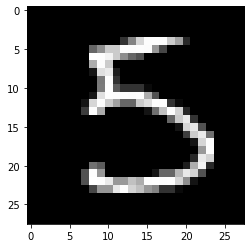

Output  3   Class:  [5]


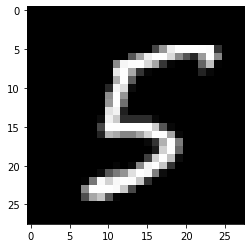

Output  4   Class:  [5]


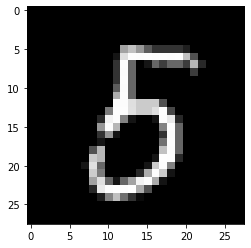

Output  5   Class:  [5]


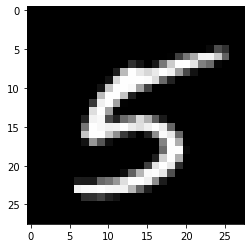

Output  6   Class:  [5]


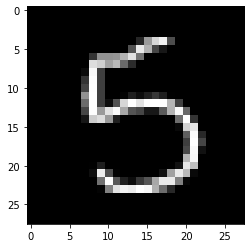

Output  7   Class:  [5]


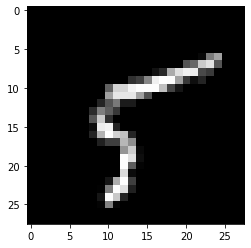

Output  8   Class:  [5]


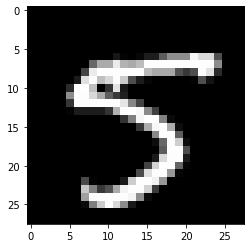

Output  9   Class:  [5]


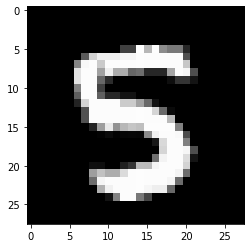

Output  10   Class:  [5]


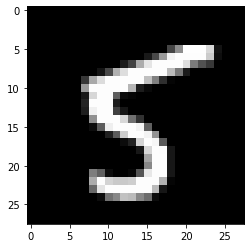

Model's prediction on test images of class 6
Output  1   Class:  [6]


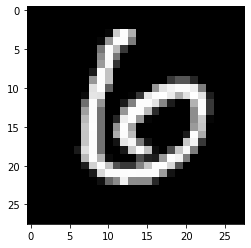

Output  2   Class:  [6]


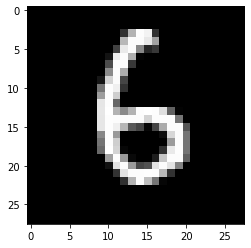

Output  3   Class:  [6]


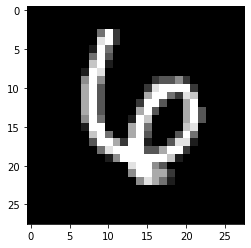

Output  4   Class:  [6]


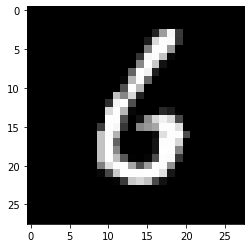

Output  5   Class:  [6]


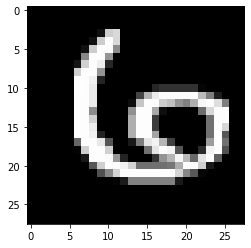

Output  6   Class:  [6]


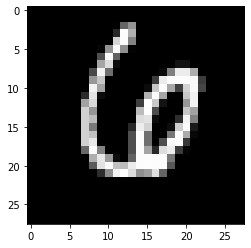

Output  7   Class:  [6]


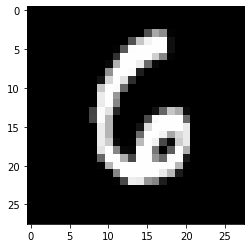

Output  8   Class:  [6]


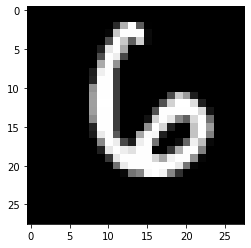

Output  9   Class:  [6]


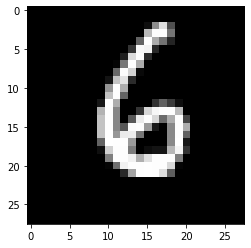

Output  10   Class:  [6]


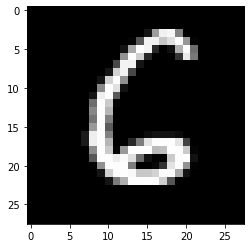

Model's prediction on test images of class 7
Output  1   Class:  [7]


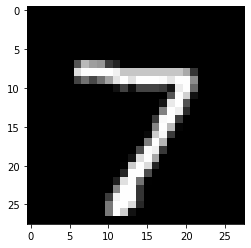

Output  2   Class:  [7]


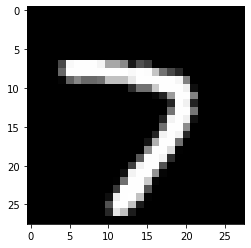

Output  3   Class:  [7]


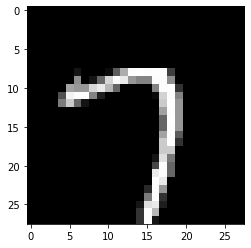

Output  4   Class:  [7]


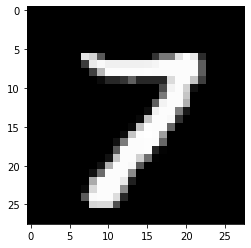

Output  5   Class:  [7]


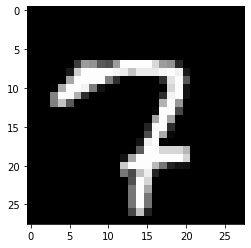

Output  6   Class:  [7]


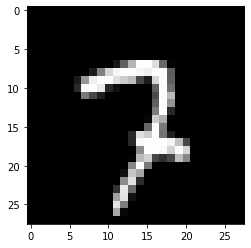

Output  7   Class:  [7]


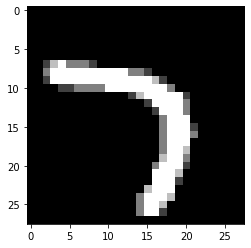

Output  8   Class:  [7]


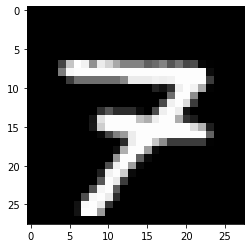

Output  9   Class:  [7]


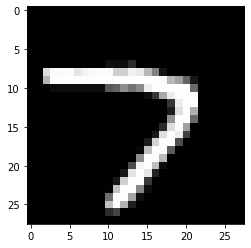

Output  10   Class:  [7]


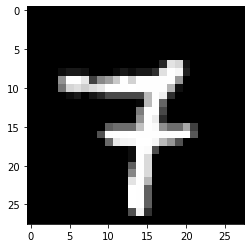

Model's prediction on test images of class 8
Output  1   Class:  [8]


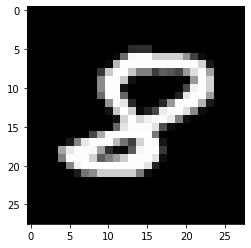

Output  2   Class:  [8]


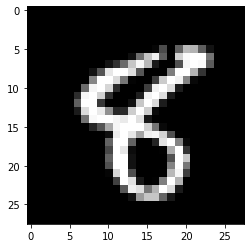

Output  3   Class:  [8]


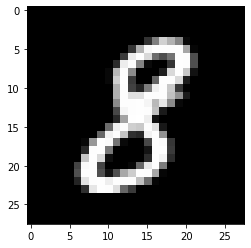

Output  4   Class:  [8]


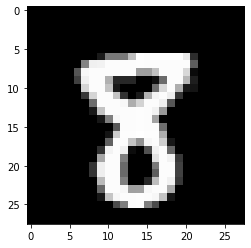

Output  5   Class:  [8]


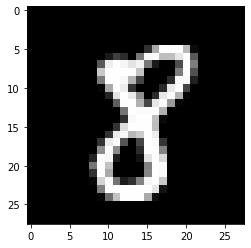

Output  6   Class:  [8]


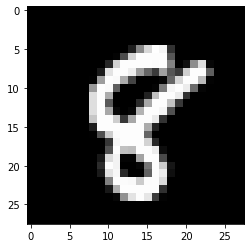

Output  7   Class:  [8]


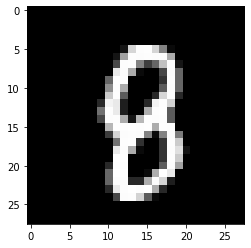

Output  8   Class:  [8]


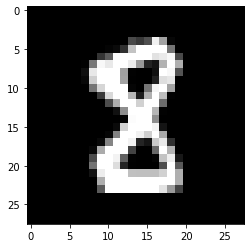

Output  9   Class:  [8]


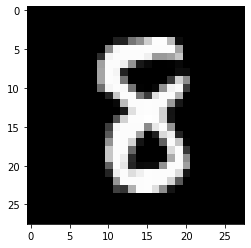

Output  10   Class:  [8]


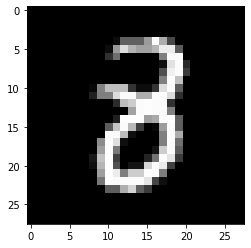

Model's prediction on test images of class 9
Output  1   Class:  [9]


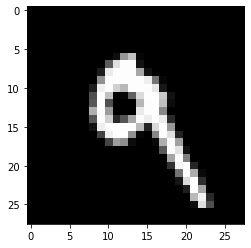

Output  2   Class:  [9]


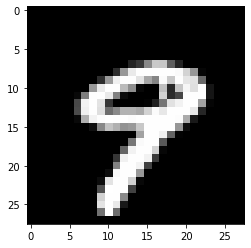

Output  3   Class:  [9]


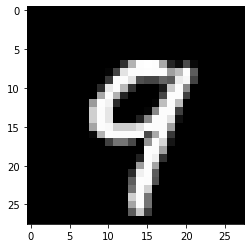

Output  4   Class:  [9]


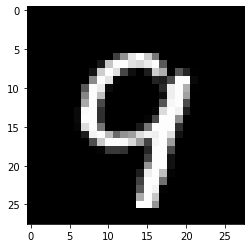

Output  5   Class:  [9]


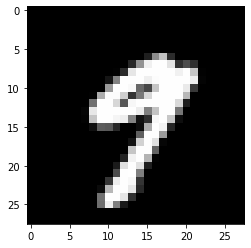

Output  6   Class:  [9]


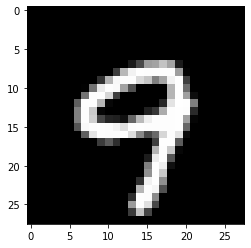

Output  7   Class:  [9]


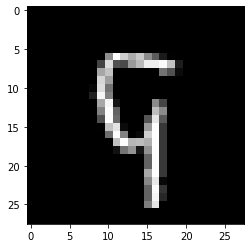

Output  8   Class:  [9]


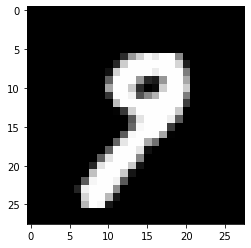

Output  9   Class:  [9]


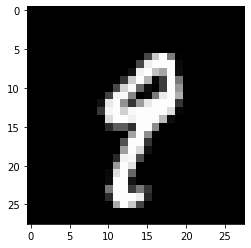

Output  10   Class:  [4]


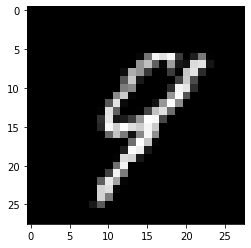

In [72]:
# load dataset
(_,_), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
testX = testX.reshape((testX.shape[0], 28, 28, 1))

testX = testX.astype('float32')
testX = testX / 255.0

test_for_each_class=[[] for i in range (0,10)]
for i,img in enumerate(testX):
    idx=testY[i]
    if(len(test_for_each_class[idx])<10):
        test_for_each_class[idx].append(img)
result=np.array(test_for_each_class)
print(result.shape)
for i,c in  enumerate(result):
    print("Model's prediction on test images of class", i)
    for i,img in enumerate(c):
        pyplot.imshow(img, cmap=pyplot.get_cmap('gray'))
        img=img[np.newaxis,:,:,:]
        output =model.predict(img)
        print("Output ", i+1, "  Class: ", np.argmax(output,axis = 1))
        output= model.predict(img)
        pyplot.pause(0.05)


### Evaluate Model Performance on the Outlier Data

63.png
Output for outlier  1 [[2.1364467e-11 1.6111305e-12 3.2419687e-06 1.2395516e-09 3.7500516e-08
  7.9419023e-12 7.7734441e-10 9.5411238e-08 9.9999630e-01 3.7048761e-07]]   Class:  [8]


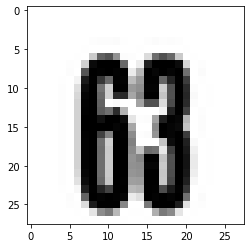

72.png
Output for outlier  2 [[1.7950031e-03 1.5308434e-08 6.3119212e-04 1.5386674e-07 1.1599627e-03
  3.7213596e-10 1.2370335e-03 3.4657877e-02 9.5631438e-01 4.2044977e-03]]   Class:  [8]


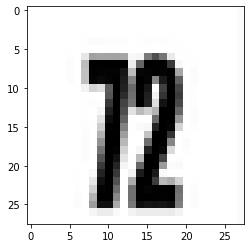

7_weird.jpeg
Output for outlier  3 [[1.8738639e-01 2.0080377e-05 1.1883071e-01 6.4400718e-02 2.8568223e-02
  2.7695214e-04 3.1112917e-04 1.4474514e-01 2.3168626e-01 2.2377442e-01]]   Class:  [8]


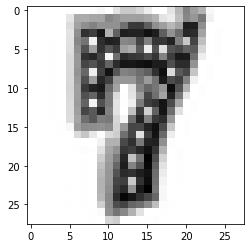

16.png
Output for outlier  4 [[5.8886551e-05 1.4008866e-08 5.8516083e-08 5.0869785e-13 1.5987320e-05
  2.4393848e-01 7.5524056e-01 4.4090927e-04 3.0504697e-04 6.4218142e-10]]   Class:  [6]


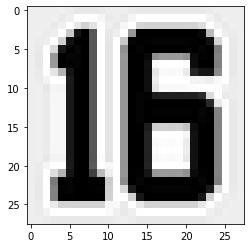

76.jpeg
Output for outlier  5 [[5.5172960e-03 2.0921907e-11 1.8756013e-07 5.7297198e-09 4.8183757e-10
  1.5923952e-08 1.4966976e-02 5.2701665e-07 9.7951508e-01 4.5137934e-08]]   Class:  [8]


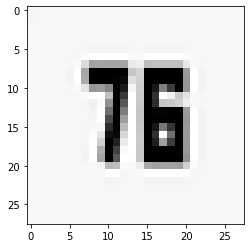

10.png
Output for outlier  6 [[2.7356956e-03 2.4873893e-06 5.2115228e-03 3.4228548e-01 3.9952224e-06
  3.1037133e-03 1.0807525e-02 8.4980202e-06 6.2963378e-01 6.2072878e-03]]   Class:  [8]


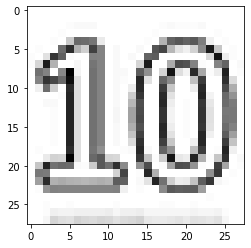

34.jpeg
Output for outlier  7 [[1.8831801e-05 9.1670006e-07 4.1515438e-04 8.7074059e-01 5.7372379e-08
  2.5129111e-03 4.0837668e-04 2.8771192e-06 1.2558854e-01 3.1168890e-04]]   Class:  [3]


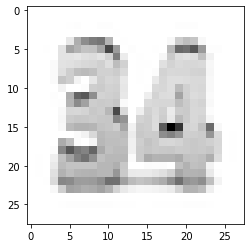

23.png
Output for outlier  8 [[1.1249397e-05 3.3463801e-09 9.6219219e-07 2.5303580e-04 1.1636415e-05
  1.6882741e-05 3.5016259e-05 7.9833117e-06 9.9966240e-01 9.9934186e-07]]   Class:  [8]


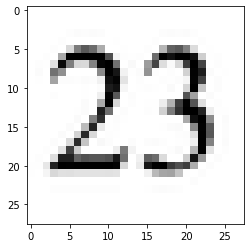

43.jpeg
Output for outlier  9 [[1.2022319e-07 1.2206311e-05 4.6283471e-06 2.3116283e-03 9.4702137e-01
  2.5022349e-09 1.2956689e-05 1.6453506e-02 3.3630293e-02 5.5331527e-04]]   Class:  [4]


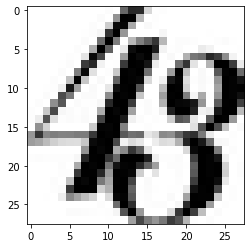

9_weird.jpeg
Output for outlier  10 [[2.4974015e-06 2.8813243e-05 7.3399598e-05 2.3547285e-04 2.0478719e-05
  4.0000273e-04 6.2485462e-08 1.6209978e-04 1.7207184e-04 9.9890506e-01]]   Class:  [9]


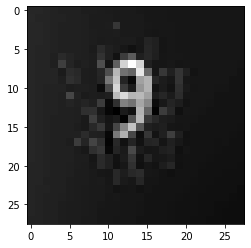

100.jpeg
Output for outlier  11 [[4.4645011e-01 9.6294582e-07 1.3805208e-04 8.5008605e-09 9.9632819e-04
  8.5327731e-05 1.7136196e-03 6.8223245e-02 4.7728464e-01 5.1076114e-03]]   Class:  [8]


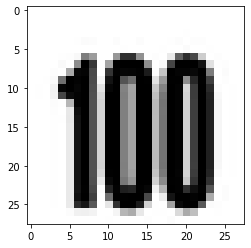

62.jpeg
Output for outlier  12 [[5.3048054e-05 5.7373552e-07 1.3561503e-03 8.9639020e-01 6.0507332e-08
  2.8416251e-03 5.0515583e-04 1.5927071e-06 9.8380685e-02 4.7096860e-04]]   Class:  [3]


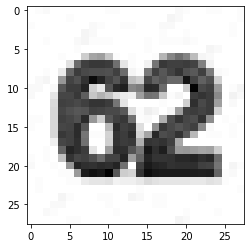

65.jpeg
Output for outlier  13 [[4.7893232e-09 4.5775998e-14 1.7674701e-10 7.5594265e-08 5.9674498e-13
  1.2563954e-05 7.6189965e-05 3.2388460e-12 9.9991119e-01 8.2610629e-09]]   Class:  [8]


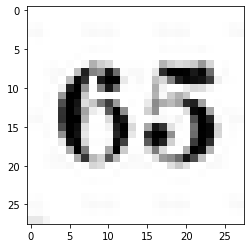

In [42]:
for i,img in enumerate(os.listdir(IMG_DIR)):
    print(img)
    img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)
    img_pil = Image.fromarray(img_array)
    img_28x28 = np.array(img_pil.resize((28, 28), Image.ANTIALIAS))
    img_28x28= img_28x28.astype('float32')
    img_28x28 = img_28x28 / 255.0
    pyplot.imshow(img_28x28, cmap=pyplot.get_cmap('gray'))
    img_28x28=img_28x28[np.newaxis,:,:,np.newaxis]
    output =model.predict(img_28x28)
    print("Output for outlier ", i+1, output, "  Class: ", np.argmax(output,axis = 1))
    pyplot.pause(0.05)